# **Trabalho 1 - PLN**
## **Parte 2**

#### Importando as bibliotecas

In [1]:
import pandas as pd
import re
from Levenshtein import distance as levenshtein_distance

# Biblioteca para trabalhar com dataframes
import pandas as pd
# Bibliotecas para plotar com gráficos
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#### Carregando o _dataset_

In [2]:
data = pd.read_csv('dataset.ptbr_harem.csv', delimiter=';')
data.head()

,SENTENCE_ID,RELATION_ID,SENTENCE,ARGUMENT_1,ARGUMENT_1_CATEGORY,RELATION,ARGUMENT_2,ARGUMENT_2_CATEGORY
0,3,1,"Marcelo_Tejedor, paleontólogo de a Universidad...",Marcelo_Tejedor,PER,1,Universidade_Nacional_da_Patagônia,ORG
1,4,3,Esse é um alvo viável para remédios contra a o...,John_Clapham,PER,1,Smith_Kline_Beecham,ORG
2,9,2,Um grupo que reúne 13 sociedades científicas n...,Associação_Nacional_de_Biossegurança,ORG,7,ANBio,ORG
3,10,1,"Primeiro, pede que a CTNBio (Comissão_Técnica_...",CTNBio,ORG,7,Comissão_Técnica_Nacional_de_Biossegurança,ORG
4,11,1,A idéia foi lançada por o ministro_Roberto_Ama...,ministro_Roberto_Amaral,PER,2,Ciência_e_Tecnologia,ORG


#### Carregando as relações definidas

In [3]:
relations = pd.read_csv('relations.csv', delimiter=';')
relations

,relation_id,relation_name,relation_tuples
0,1,trabalha em,"(PER,ORG),(ORG,ORG),(ORG,PLC)"
1,2,trabalha com,"(PLC,ORG),(ORG,ORG),(ORG,PER),(PER,ORG)"
2,3,pertence a/ao,"(PER,ORG),(ORG,ORG),(ORG,PLC)"
3,4,é localizada(o) em,"(ORG,ORG),(ORG,PLC),(PER,PLC)"
4,5,é o local de,"(PLC,ORG),(ORG,ORG),(ORG,PLC)"
5,6,é fundada(o) por,"(ORG,PER)"
6,7,sigla,"(ORG,ORG)"
7,8,está relacionada(o) com,ALL


#### Regras

Cada relação possui uma função correspondente, cuja cada conjunto dado de argumentos, tipos dos argumentos e sentença resultam em uma probabilidade da relação em questão. A pontuação mais alta é a considerada como relação encontrada.

In [4]:
# Testa se determinada relação inclui a combinação (ARGUMENT_1_CATEGORY,ARGUMENT_2_CATEGORY)
def has_tuple(cat_arg1, cat_arg2, relation_id):
    index = relation_id - 1
    test_tuple = '('+cat_arg1+','+cat_arg2+')'
    if test_tuple in relations.loc[index]['relation_tuples']:
        return True
    
    return False

# Cria uma lista das possíveis relações, dada a combinação das categorias dos argumentos
def possible_relations(cat_arg1, cat_arg2):
    possible_r = []
    
    for index, relation in relations.iterrows():
        if has_tuple(cat_arg1, cat_arg2, relation['relation_id']):
            possible_r.append(relation['relation_id'])
    
    return possible_r

In [5]:

############ Relação 1 - trabalha em -- OK
def relation1(arg1, arg2, cat_arg1, cat_arg2, sentence):
    
    # ID da relação 1
    r_id = 1
    # Probabilidade inicial
    p = 0.0
    # Verifica as relações possíveis
    possible_r = possible_relations(cat_arg1, cat_arg2)

    # Caso esteja entre as possíveis, divide a possibilidade entre cada uma
    if r_id in possible_r:
        p = 1 / len(possible_r)
        # Caso seja a unica possível, retorna
        if p == 1:
            return p
    # Senão retorna zero
    else:
        return p
    
    # Testando palavras e trechos
    if re.search("trabalha (em)?", sentence, flags=re.I):
        p += 0.5
    
    if re.search("de [ao] "+arg2, sentence, flags=re.I):
        p += 0.2
                
    return p


############## Relação 2 - trabalha com -- OK
def relation2(arg1, arg2, cat_arg1, cat_arg2, sentence):
    
    # ID da relação 2
    r_id = 2
    # Probabilidade inicial
    p = 0.0
    # Verifica as relações possíveis
    possible_r = possible_relations(cat_arg1, cat_arg2)

    # Caso esteja entre as possíveis, divide a possibilidade entre cada uma
    if r_id in possible_r:
        p = 1 / len(possible_r)
        # Caso seja a unica possível, retorna
        if p == 1:
            return p
    # Senão retorna zero
    else:
        return p
    
    # Testando palavras e trechos
    if re.search("trabalha com|coopera com", sentence, flags=re.I):
        p += 0.5
    
    if re.search(arg1+"\s?(\s?"+arg2+"\s?)\s?", sentence, flags=re.I):
        p += 0.3
    
    return p

############## Relação 3 - pertence a/ao -- OK
def relation3(arg1, arg2, cat_arg1, cat_arg2, sentence):
    
    # ID da relação 3
    r_id = 3
    # Probabilidade inicial
    p = 0.0
    # Verifica as relações possíveis
    possible_r = possible_relations(cat_arg1, cat_arg2)

    # Caso esteja entre as possíveis, divide a possibilidade entre cada uma
    if r_id in possible_r:
        p = 1 / len(possible_r)
        # Caso seja a unica possível, retorna
        if p == 1:
            return p
    # Senão retorna zero
    else:
        return p
    
    if re.search("pertence|faz parte|integra", sentence, flags=re.I):
        p += 0.3
    
    # Testando palavras e trechos                
    return p

############ Relação 4 - é localizada(o) em -- OK
def relation4(arg1, arg2, cat_arg1, cat_arg2, sentence):
    
    # ID da relação 4
    r_id = 4
    # Probabilidade inicial
    p = 0.0
    # Verifica as relações possíveis
    possible_r = possible_relations(cat_arg1, cat_arg2)

    # Caso esteja entre as possíveis, divide a possibilidade entre cada uma
    if r_id in possible_r:
        p = 1 / len(possible_r)
        # Caso seja a unica possível, retorna
        if p == 1:
            return p
    # Senão retorna zero
    else:
        return p
    
    # Testando palavras e trechos
    if re.search("local", sentence, flags=re.I):
        
        try:
            result = sentence.index('local')
            result2 = re.search(arg1, sentence, flags=re.I).start()
            
            if result < result2:
                p += 0.1
                
        except:
            pass
                
        p += 0.5
    
    if re.search(arg1+"\s?(\s?"+arg2+"\s?)\s?", sentence, flags=re.I):
        p += 0.2
    
    if re.search(arg1+"\s?,\s?"+arg2, sentence, flags=re.I):
        p += 0.2
    
    return p

############## Relação 5 - é o local de
def relation5(arg1, arg2, cat_arg1, cat_arg2, sentence):
    
    # ID da relação 5
    r_id = 5
    # Probabilidade inicial
    p = 0.0
    # Verifica as relações possíveis
    possible_r = possible_relations(cat_arg1, cat_arg2)

    # Caso esteja entre as possíveis, divide a possibilidade entre cada uma
    if r_id in possible_r:
        p = 1 / len(possible_r)
        # Caso seja a unica possível, retorna
        if p == 1:
            return p
    # Senão retorna zero
    else:
        return p
    
    # Testando palavras e trechos
    if re.search("local", sentence, flags=re.I):
        
        try:
            result = sentence.index('local')
            result2 = re.search(arg1, sentence, flags=re.I).start()
            
            if result < result2:
                p += 0.1
            
        except:
            pass
                
        p += 0.5
    
    if re.search(arg1+"\s?\(\s?"+arg2+"\s?\)\s?", sentence, flags=re.I):
        p += 0.2
    
    if re.search(arg1+"\s?,\s?"+arg2, sentence, flags=re.I):
        p += 0.2
                    
    return p



############## Relação 6 - é fundada(o) por -- OK
def relation6(arg1, arg2, cat_arg1, cat_arg2, sentence):
    
    # ID da relação 6
    r_id = 6
    # Probabilidade inicial
    p = 0.0
    # Verifica as relações possíveis
    possible_r = possible_relations(cat_arg1, cat_arg2)

    # Caso esteja entre as possíveis, divide a possibilidade entre cada uma
    if r_id in possible_r:
        p = 1 / len(possible_r)
        # Caso seja a unica possível, retorna
        if p == 1:
            return p
    # Senão retorna zero
    else:
        return p
    
    # Testando palavras e trechos
    if re.search("fundad|fundou|fundação", sentence, flags=re.I):
        p += 0.6
        
    return p


############## Relação 7 - sigla -- OK
def relation7(arg1, arg2, cat_arg1, cat_arg2, sentence):
    
    # ID da relação 7
    r_id = 7
    # Probabilidade inicial
    p = 0.0
    # Verifica as relações possíveis
    possible_r = possible_relations(cat_arg1, cat_arg2)

    # Caso esteja entre as possíveis, divide a possibilidade entre cada uma
    if r_id in possible_r:
        p = 1 / len(possible_r)
        # Caso seja a unica possível, retorna
        if p == 1:
            p = 100
            return p
    # Senão retorna zero
    else:
        return p
    
    # Gerando siglas
    
    pattern= '[A-Z]+'
    
    # Transforma o arg1 em sigla
    sigla1 = re.findall(pattern, arg1)
    sigla1 = "".join(sigla1)
    
    # Transforma o arg2 em sigla
    sigla2 = re.findall(pattern, arg2)
    sigla2 = "".join(sigla2)
    
    # Se a distância de levenshtein for menor que 3, é uma sigla
    if (levenshtein_distance(sigla1, arg2) < 4) or (levenshtein_distance(sigla2, arg1) < 4):
        p = 1
        
    return p

#### Funções auxiliares

In [6]:

# Classifica a relação presente na sentença
def predict (data):
    one_hot = [0] * 7
    
    sentence = data["SENTENCE"]
    arg1 = data["ARGUMENT_1"] 
    cat_arg1 = data["ARGUMENT_1_CATEGORY"]
    arg2 = data["ARGUMENT_2"] 
    cat_arg2 = data["ARGUMENT_2_CATEGORY"]
    
    one_hot[0] = relation1(arg1, arg2, cat_arg1, cat_arg2, sentence)
    one_hot[1] = relation2(arg1, arg2, cat_arg1, cat_arg2, sentence)
    one_hot[2] = relation3(arg1, arg2, cat_arg1, cat_arg2, sentence)
    one_hot[3] = relation4(arg1, arg2, cat_arg1, cat_arg2, sentence)
    one_hot[4] = relation5(arg1, arg2, cat_arg1, cat_arg2, sentence)
    one_hot[5] = relation6(arg1, arg2, cat_arg1, cat_arg2, sentence)
    one_hot[6] = relation7(arg1, arg2, cat_arg1, cat_arg2, sentence)
    
    r = max(one_hot)
    
    if r < 0.2:
        return 8
    else:
        return one_hot.index(r)+1
    
    

#### Testes

In [7]:
X = data.drop(["SENTENCE_ID", "RELATION_ID", "RELATION"], axis=1)
y = data["RELATION"]

In [8]:
preds = []

for index, row in data.iterrows():
    pred = predict(row)
    preds.append(pred)

In [9]:
df = pd.DataFrame({'Actual': y, 'Predicted': preds})
df1 = df.head(10)
df1

,Actual,Predicted
0,1,1
1,1,1
2,7,7
3,7,7
4,2,1
5,7,7
6,1,1
7,1,1
8,7,7
9,3,1


In [10]:
acc = "{:.2f}".format(accuracy_score(y, preds) * 100)
print("Acurácia de: "+acc+"%.")

Acurácia de: 42.28%.


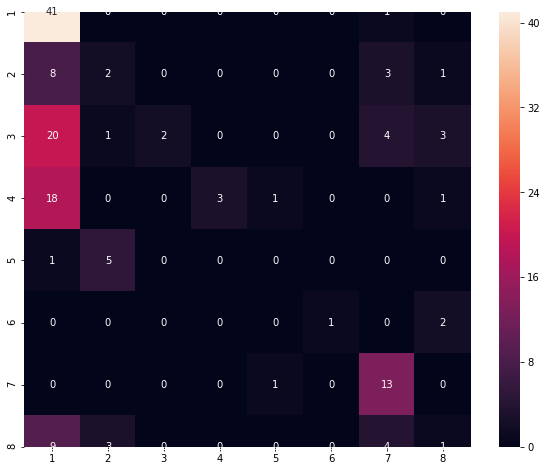

In [11]:
# Criando uma matriz de confusao
confusion_m = pd.DataFrame(confusion_matrix(y,preds), columns=range(1,9), index=range(1,9))

# Exibindo a matriz de forma gráfica
plt.rcParams["figure.figsize"] = (10,8)
plt.show(sns.heatmap(confusion_m, annot=True, fmt='g')) 